### First attempt at building a model ###

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('ll_condenesed_data.csv', index_col=0)

In [3]:
df.columns

Index(['saleprice', 'sqfttotliving', 'yrbuilt', 'yrrenovated', 'bedrooms',
       'zipcode', 'sqfttotbasement', 'sqftfinbasement', 'sqftopenporch',
       'sqftenclosedporch', 'sqftdeck', 'heatsystem', 'heatsource',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount', 'condition',
       'viewutilization', 'sqftgarageattached', 'daylightbasement',
       'finbasementgrade', 'hbuasifvacant', 'inadequateparking', 'township',
       'mtrainier', 'olympics', 'cascades', 'territorial', 'seattleskyline',
       'pugetsound', 'lakewashington', 'lakesammamish', 'smalllakerivercreek',
       'otherview', 'wfntlocation', 'trafficnoise', 'airportnoise',
       'powerlines', 'othernuisances', 'adjacentgreenbelt'],
      dtype='object')

adding up the baths and porch squarefootage

In [4]:
df['porch'] = df['sqftopenporch']+df['sqftenclosedporch']
df['baths'] = df['bathfullcount']+(0.75*df['bath3qtrcount'])+(0.5*df['bathhalfcount'])
df

,saleprice,sqfttotliving,yrbuilt,yrrenovated,bedrooms,zipcode,sqfttotbasement,sqftfinbasement,sqftopenporch,sqftenclosedporch,...,smalllakerivercreek,otherview,wfntlocation,trafficnoise,airportnoise,powerlines,othernuisances,adjacentgreenbelt,porch,baths
0,1910000,3990,1952,2019,6,98125,1360,1360,110,0,...,0,0,0,0,0,N,N,N,110,4.50
1,1089950,3920,2018,0,5,98028.0,930,930,550,0,...,0,0,0,0,0,N,N,N,550,3.25
2,412500,2280,1958,0,4,98056,1140,1140,0,0,...,0,0,0,1,0,N,N,N,0,1.75
3,541000,1030,1965,0,3,98052,0,0,210,0,...,0,0,0,0,0,N,N,N,210,1.50
4,1020000,2410,1939,0,3,98144,1070,1070,0,0,...,0,0,0,1,0,N,N,N,0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,1201000,3680,1974,0,5,98072,0,0,50,0,...,0,0,0,0,0,N,N,N,50,3.00
18289,921000,2280,2016,0,3,NaN,0,0,110,0,...,0,0,0,0,0,N,N,N,110,2.50
18290,627000,3820,1967,0,5,98058,0,0,80,0,...,0,0,0,0,0,N,N,N,80,2.25
18291,640000,2450,2015,0,4,98146,0,0,50,0,...,0,0,0,2,0,N,N,N,50,2.50


dropping bath-breakdown and porch types

In [5]:
df.drop(columns=['sqftopenporch', 'sqftenclosedporch', 'bathfullcount', 'bath3qtrcount', 'bathhalfcount'], inplace=True)

In [6]:
df.lakewashington.unique()

array([1, 0, 4, 3, 2])

lets see some plots

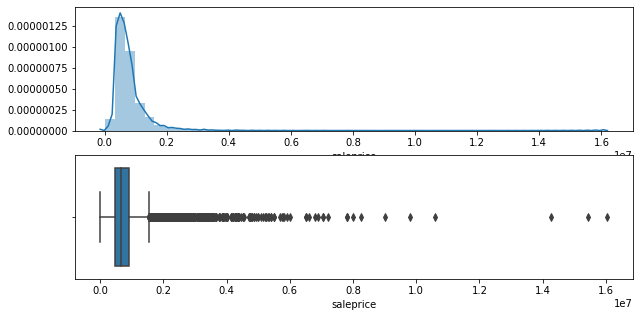

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(df.saleprice, ax = ax[0])
sns.boxplot(df.saleprice, ax= ax[1])

In [8]:
df.corr().loc[:, 'saleprice']

saleprice              1.000000
sqfttotliving          0.629960
yrbuilt                0.083728
yrrenovated            0.116650
bedrooms               0.279942
sqfttotbasement        0.274627
sqftfinbasement        0.293731
sqftdeck               0.212555
heatsystem             0.137244
heatsource            -0.052527
condition             -0.043637
sqftgarageattached     0.171776
finbasementgrade       0.235494
hbuasifvacant         -0.009956
inadequateparking      0.049376
township               0.340959
mtrainier              0.076261
olympics               0.154945
cascades               0.125105
territorial            0.312533
seattleskyline         0.181434
pugetsound             0.106470
lakewashington         0.375150
lakesammamish          0.158958
smalllakerivercreek    0.041940
otherview              0.098647
wfntlocation           0.259750
trafficnoise          -0.001479
airportnoise                NaN
porch                  0.268174
baths                  0.501689
Name: sa

choosing the highest correlation with saleprice and also choosing only the features of the property for now 
(will look into the location aspects which is the key in real estate as we progress)

`sqfttotliving` **0.621515**

`baths` **0.501689**

`porch` **0.268174**


checking for linearity between the chosen predictors

In [9]:
df_fsm = df.loc[:, ['saleprice', 'sqfttotliving', 'baths', 'porch']]
df_fsm

,saleprice,sqfttotliving,baths,porch
0,1910000,3990,4.50,110
1,1089950,3920,3.25,550
2,412500,2280,1.75,0
3,541000,1030,1.50,210
4,1020000,2410,1.75,0
...,...,...,...,...
18288,1201000,3680,3.00,50
18289,921000,2280,2.50,110
18290,627000,3820,2.25,80
18291,640000,2450,2.50,50


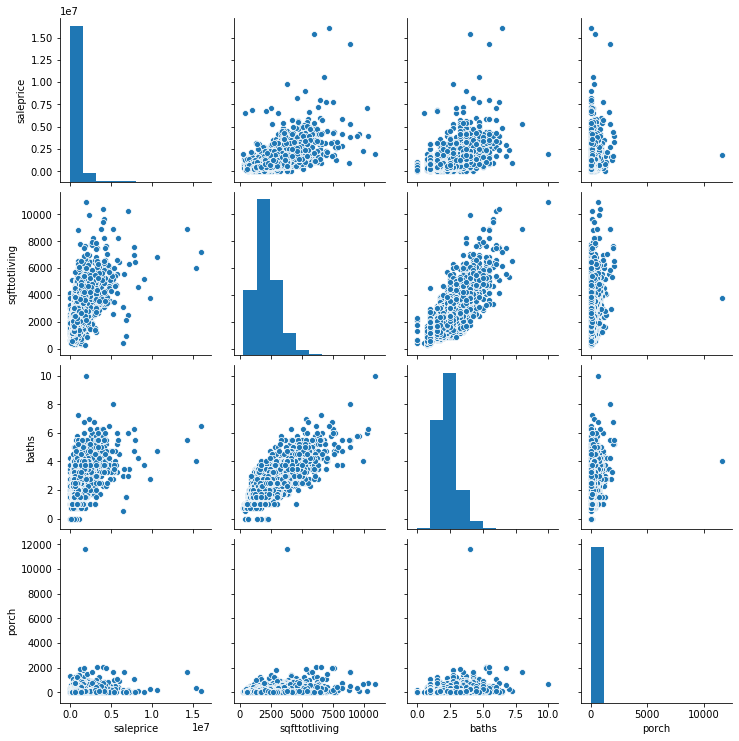

In [10]:
sns.pairplot(df_fsm);

In [11]:
formula = 'saleprice ~ sqfttotliving + baths + porch'
fsm = ols(formula=formula, data=df_fsm).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     4063.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:23:38   Log-Likelihood:            -2.6424e+05
No. Observations:               18293   AIC:                         5.285e+05
Df Residuals:                   18289   BIC:                         5.285e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.856e+04   9944.523     -3.877      0.000    -5.8e+04   -1.91e+04
sqfttotliving   357.7070      5.703     62.721      0.000     346.528     368.886
baths           2.16e+04   6685.384      3.230      0.001    8491.937    3.47e+04
porch           213.1762     23.204      9.187      0.000     167.693     258.659
==============================================================================
Omnibus:                    23709.455   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13491984.567
Skew:                           6.811   Prob(JB):                         0.00
Kurtosis:                     135.347   Cond. No.                     7.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print('R-squared of our fsm', fsm.rsquared)
print('Beta values of our fsm', fsm.params)

R-squared of our fsm 0.3999553323886742
Beta values of our fsm Intercept       -38555.508944
sqfttotliving      357.707005
baths            21595.915520
porch              213.176162
dtype: float64


In [14]:
residuals = fsm.resid

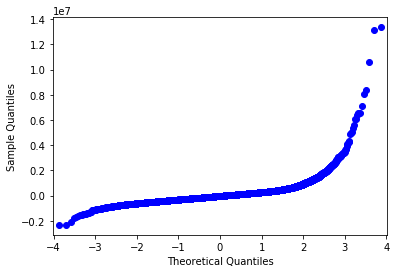

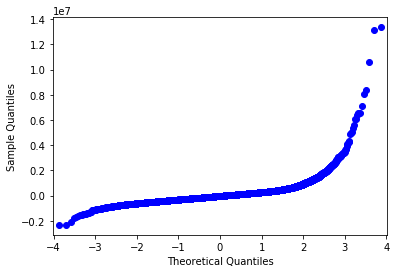

In [15]:
sm.qqplot(residuals)

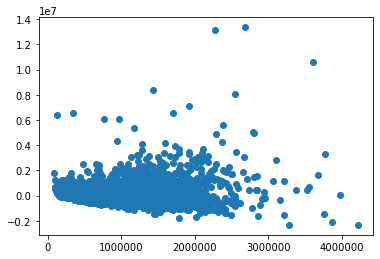

In [16]:
predictions = fsm.predict()
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)